In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
depths_dir = '../dataset/data/depths'
cam_H, cam_W = 580, 890

In [4]:
depths = np.array([np.load(os.path.join(depths_dir, 'depth_%02d/20231109_depth_%02d.npy'%(i,i)))[:,:,2]*1e3 for i in range(len(os.listdir(depths_dir)))])

In [5]:
depths[:,:,:400] = 0
depths[:,:,690:] = 0

In [6]:
# 690 400

In [7]:
depths[1].max()

949.7708740234375

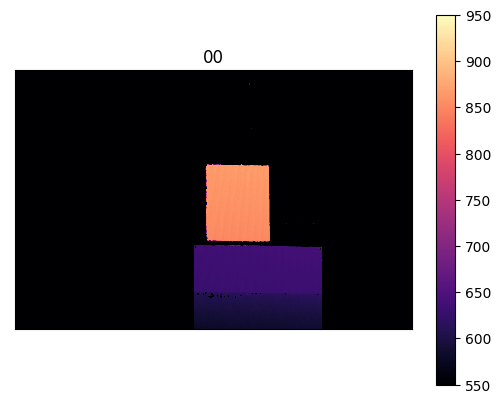

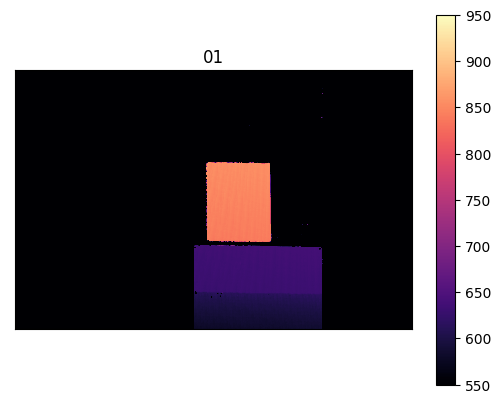

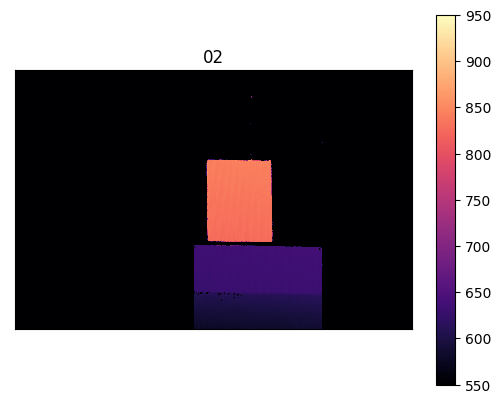

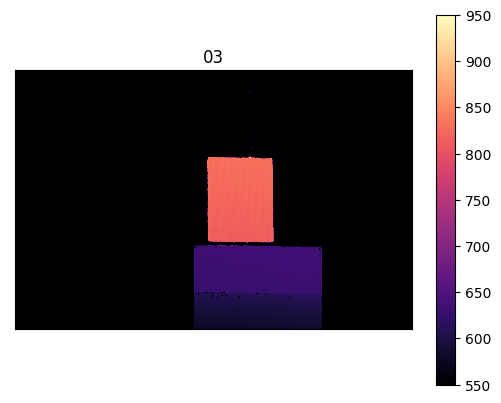

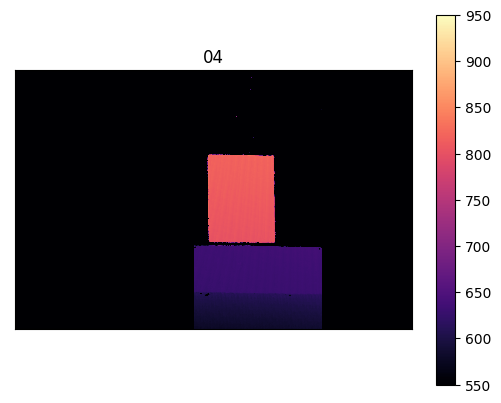

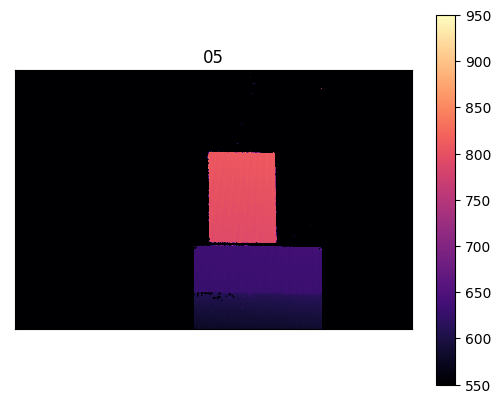

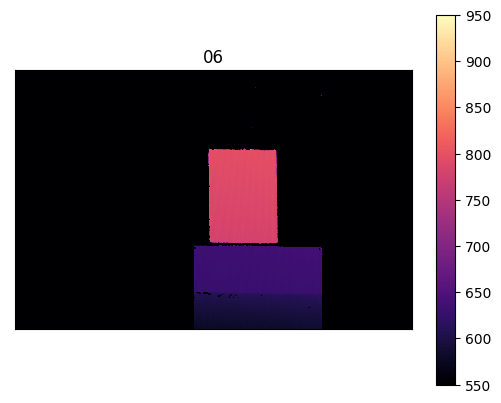

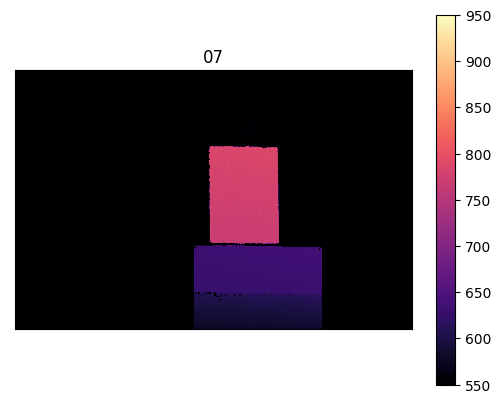

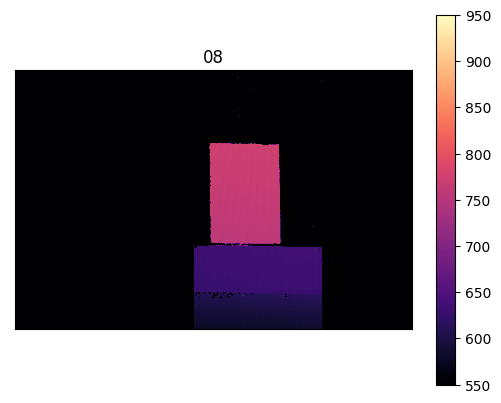

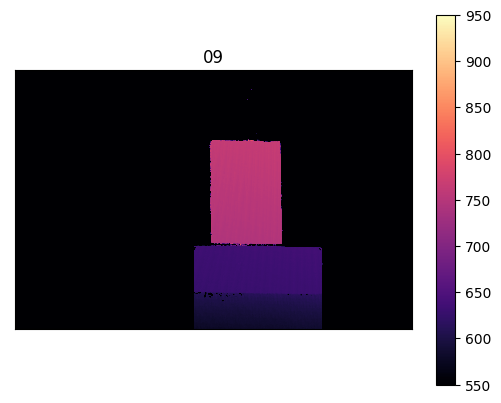

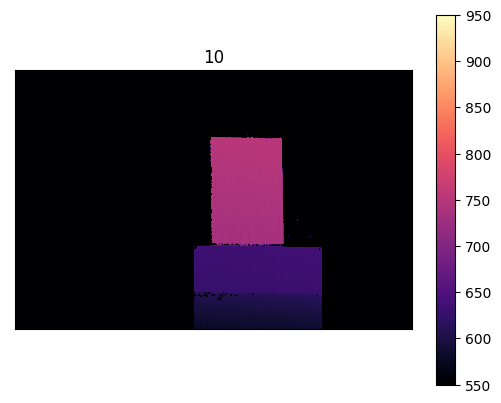

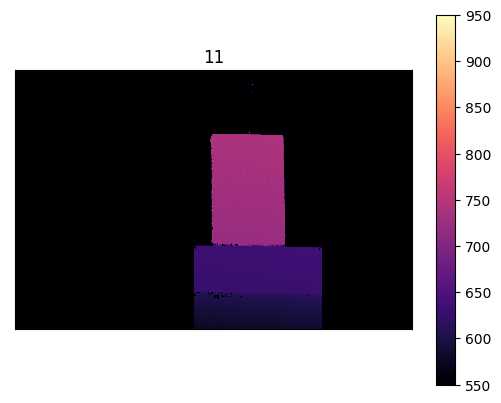

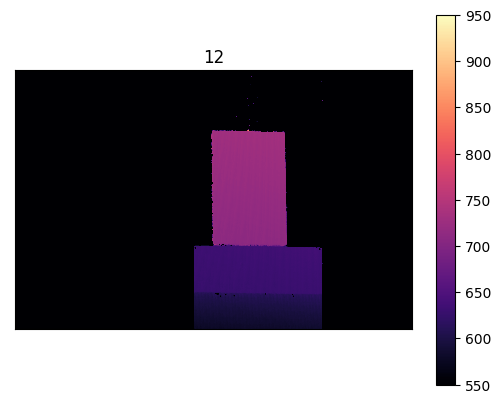

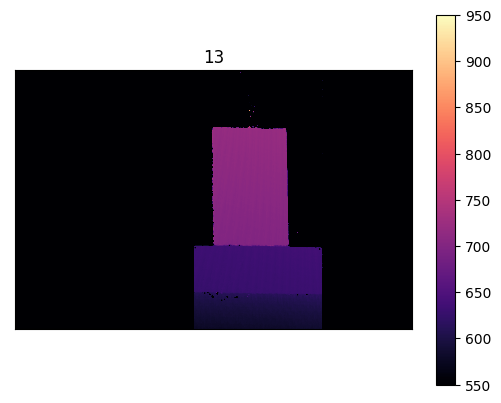

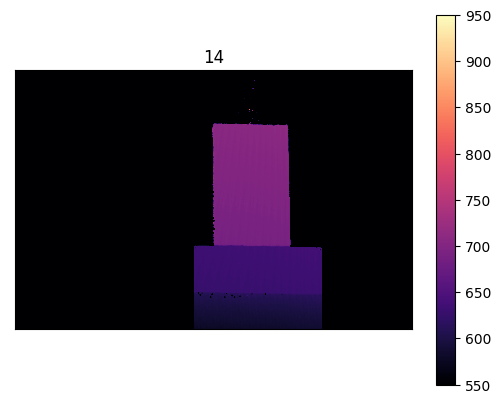

In [13]:
for i in range(len(depths)):
    fig, ax = plt.subplots()
    plt.imshow(depths[i], cmap ='magma', vmin = 550, vmax = 950), plt.title('%02d'%i),plt.colorbar()
    ax.set_xticks([])  # Erase x ticks
    ax.set_yticks([])  # Erase y ticks
    plt.savefig('./%02d.png'%i)

In [12]:
np.save('./gt_depths.npy', depths)

In [6]:
mean_depth = np.array([depths[i,280:310,500:530].mean(axis = (0,1)) for i in range(len(depths))][::-1])

In [7]:
# plt.plot(mean_depth)
# for i in range(len(mean_depth)-1):
diff = np.array([mean_depth[i] - mean_depth[i+1] for i in range(len(mean_depth)-1)])
    # print(diff)

In [30]:
mean_depth[0]-mean_depth[9]

-104.18544867621529

In [14]:
mean_depth

array([695.18874254, 705.81087023, 717.60082764, 728.92151157,
       741.4946481 , 752.67903503, 764.35887519, 775.75072157,
       787.31971056, 799.37419122, 810.02969218, 822.6098664 ,
       835.27150757, 847.7832432 , 859.15268629])

In [15]:
gt

array([695.18874254, 706.90045281, 718.61216308, 730.32387334,
       742.03558361, 753.74729388, 765.45900415, 777.17071442,
       788.88242468, 800.59413495, 812.30584522, 824.01755549,
       835.72926576, 847.44097602, 859.15268629])

In [9]:
gt = np.array([mean_depth[0] + 11.711710268050906*i for i in range(0,15)])

In [10]:
np.square(np.subtract(mean_depth, gt)).mean()

1.3504365666983147

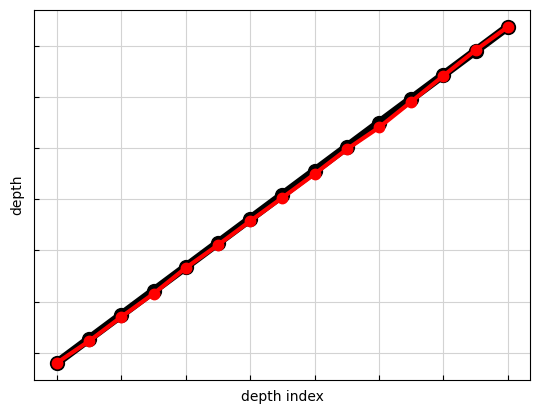

In [11]:
fig, ax = plt.subplots()
plt.plot(gt, label = 'gt', marker = '.', c = 'black', markersize = 20, linewidth = 6)
plt.plot(mean_depth, label = 'ours', marker = '.', c = 'red', markersize = 15, linewidth = 3)
# plt.legend()
plt.xlabel('depth index')
plt.ylabel('depth')
plt.grid(c = 'lightgray')
# Erasing y-axis and x-axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# # Setting ticks direction to inward
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')

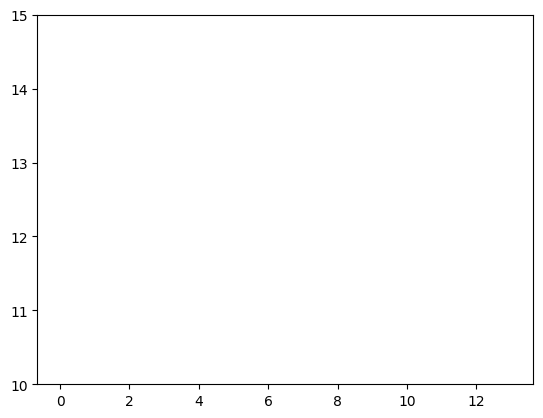

In [12]:
plt.ylim([10,15])
plt.plot(diff)

In [13]:
diff.mean()

-11.711710268050906